In [15]:
import mlrose2 as mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
import time

## Data Preparation

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.groupby('label').size()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
dtype: int64

In [5]:
#split features and targets 
X = df.drop(['label'], axis=1)
Y = df['label']

#Spliting data into training, testing set 
np.random.seed(0)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.5, stratify =Y, random_state=999)

In [6]:
# One hot encode target values
one_hot = OneHotEncoder(categories='auto')

Ytrain = one_hot.fit_transform(Ytrain.values.reshape(-1, 1)).todense()
Ytest = one_hot.fit_transform(Ytest.values.reshape(-1, 1)).todense()

In [7]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

In [8]:
len(Xtrain[1])

784

In [13]:
len(Xtrain)

21000

## Backpropagation

In [20]:
start = time.time()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(20), random_state=1, max_iter=300)
clf.fit(Xtrain, Ytrain)

end = time.time()
print("--- %s seconds ---" % (end - start))

--- 270.01352071762085 seconds ---


In [19]:
# Predict labels for train set and assess accuracy
Ytrain_pred = clf.predict(Xtrain)

Ytrain_f1 = f1_score(Ytrain, Ytrain_pred, average='macro')

print("--- Train F1: %s ---" % Ytrain_f1)

# Predict labels for test set and assess accuracy
Ytest_pred = clf.predict(Xtest)

Ytest_f1 = f1_score(Ytest, Ytest_pred, average='macro')

print("--- Test F1: %s ---" % Ytest_f1)

/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


--- Train F1: 0.11674308601659067 ---
--- Test F1: 0.1164886439947915 ---


/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
Ytrain_loss = metrics.log_lss(Ytrain, Ytrain_pred)

## randomized hill climbing

In [8]:
# Initialize neural network object and fit object
start = time.time()
np.random.seed(3)
max_iters = 10000

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'tanh', \
                                 algorithm = 'random_hill_climb', max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100)

nn_model1.fit(Xtrain, Ytrain)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 6382.253822088242 seconds ---


In [9]:
# Predict labels for train set and assess accuracy
Ytrain_pred = nn_model1.predict(Xtrain)

Ytrain_f1 = f1_score(Ytrain, Ytrain_pred, average='macro')

print("--- Train F1: %s ---" % Ytrain_f1)

# Predict labels for test set and assess accuracy
Ytest_pred = nn_model1.predict(Xtest)

Ytest_f1 = f1_score(Ytest, Ytest_pred, average='macro')

print("--- Test F1: %s ---" % Ytest_f1)

--- Train F1: 0.17367257082501958 ---
--- Test F1: 0.17048887587993736 ---


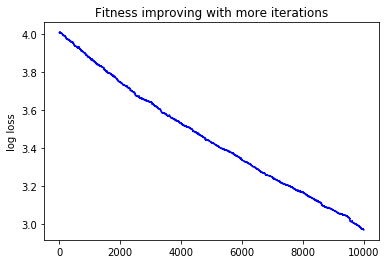

In [10]:
# loss change with number of iterations 
pd.DataFrame(nn_model1.all_loss).to_csv("nn_randomized_hill_climb_{}iter_loss.csv".format(max_iters))
plt.plot(range(1, max_iters+1), nn_model1.all_loss, color = 'blue')
plt.xlabel("number of iteration")
plt.ylabel("log loss")
plt.title("Fitness improving with more iterations")
plt.show()

In [11]:
# best weight
print("--- Number of weight: %s ---" % len(nn_model1.fitted_weights))
print("--- Min fitted weight: %s ---" % min(nn_model1.fitted_weights))
print("--- Max fitted weight: %s ---" % max(nn_model1.fitted_weights))
print("--- Mean fitted weight: %s ---" % (sum(nn_model1.fitted_weights)/len(nn_model1.fitted_weights)))

--- Number of weight: 15900 ---
--- Min fitted weight: -1.174662792834764 ---
--- Max fitted weight: 1.1990209443219524 ---
--- Mean fitted weight: -0.0061044494178600075 ---


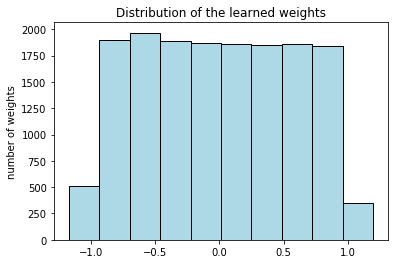

In [12]:
plt.hist(nn_model1.fitted_weights, color = 'lightblue', edgecolor = 'black')
plt.ylabel("number of weights")
plt.title('Distribution of the learned weights')
plt.show()

## simulated annealing

In [10]:
start = time.time()
# Initialize neural network object and fit object
np.random.seed(3)
max_iters = 8000

nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'tanh', \
                                 algorithm = 'simulated_annealing', schedule=mlrose.GeomDecay(init_temp=10000, decay=0.95, min_temp=0.01),\
                                 max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100)

nn_model2.fit(Xtrain, Ytrain)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 7823.860098361969 seconds ---


In [11]:
# Predict labels for train set and assess accuracy
Ytrain_pred = nn_model2.predict(Xtrain)

Ytrain_f1 = f1_score(Ytrain, Ytrain_pred, average='macro')

print("--- Train F1: %s ---" % Ytrain_f1)

# Predict labels for test set and assess accuracy
Ytest_pred = nn_model2.predict(Xtest)

Ytest_f1 = f1_score(Ytest, Ytest_pred, average='macro')

print("--- Test F1: %s ---" % Ytest_f1)

--- Train F1: 0.1010816816469388 ---
--- Test F1: 0.10123908702678959 ---


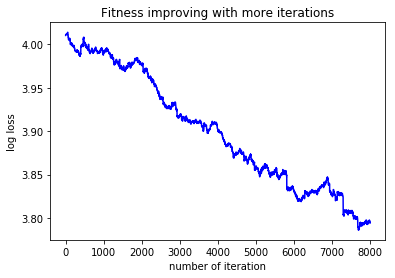

In [17]:
# loss change with number of iterations 
pd.DataFrame(nn_model2.current_best_loss).to_csv("nn_simulated_annealing_{}iter_loss.csv".format(max_iters))
plt.plot(range(1, max_iters+1), nn_model2.current_best_loss, color = 'blue')
plt.xlabel("number of iteration")
plt.ylabel("log loss")
plt.title("Fitness improving with more iterations")
plt.show()

In [21]:
nn_model2.best_fitness

AttributeError: 'NeuralNetwork' object has no attribute 'best_fitness'

In [ ]:
# best weight
print("--- Number of weight: %s ---" % len(nn_model2.fitted_weights))
print("--- Min fitted weight: %s ---" % min(nn_model2.fitted_weights))
print("--- Max fitted weight: %s ---" % max(nn_model2.fitted_weights))
print("--- Mean fitted weight: %s ---" % (sum(nn_model2.fitted_weights)/len(nn_model2.fitted_weights)))

In [ ]:
plt.hist(nn_model2.fitted_weights, color = 'lightblue', edgecolor = 'black')
plt.xlabel("weight")
plt.ylabel("number of weights")
plt.title('Distribution of the learned weights')
plt.show()

## genetic algorithm

In [28]:
start = time.time()
# Initialize neural network object and fit object
np.random.seed(3)
max_iters = 100

nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'tanh', \
                                 algorithm = 'genetic_alg', pop_size = 200, mutation_prob = 0.1, max_iters = max_iters, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100)

nn_model3.fit(Xtrain, Ytrain)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 9930.864150762558 seconds ---


In [29]:
# Predict labels for train set and assess accuracy
Ytrain_pred = nn_model3.predict(Xtrain)

Ytrain_f1 = f1_score(Ytrain, Ytrain_pred, average='macro')

print("--- Train F1: %s ---" % Ytrain_f1)

# Predict labels for test set and assess accuracy
Ytest_pred = nn_model3.predict(Xtest)

Ytest_f1 = f1_score(Ytest, Ytest_pred, average='macro')

print("--- Test F1: %s ---" % Ytest_f1)

--- Train F1: 0.1185035326100711 ---
--- Test F1: 0.11637228800919466 ---


In [ ]:
# loss change with number of iterations 
#pd.DataFrame(nn_model3.all_loss).to_csv("nn_GA_{}iter_loss.csv".format(max_iters))
plt.plot(range(1, max_iters+1), nn_model3.all_loss, color = 'blue')
plt.xlabel("number of iteration")
plt.ylabel("log loss")
plt.title("Fitness improving with more iterations")
plt.show()

In [31]:
# best weight
print("--- Number of weight: %s ---" % len(nn_model3.fitted_weights))
print("--- Min fitted weight: %s ---" % min(nn_model3.fitted_weights))
print("--- Max fitted weight: %s ---" % max(nn_model3.fitted_weights))
print("--- Mean fitted weight: %s ---" % (sum(nn_model3.fitted_weights)/len(nn_model3.fitted_weights)))

--- Number of weight: 15900 ---
--- Min fitted weight: -4.998463723291683 ---
--- Max fitted weight: 4.998639631060303 ---
--- Mean fitted weight: 0.011469276162632474 ---


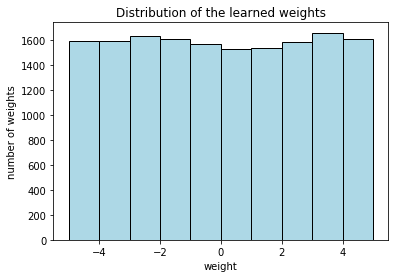

In [32]:
plt.hist(nn_model3.fitted_weights, color = 'lightblue', edgecolor = 'black')
plt.ylabel("number of weights")
plt.xlabel("weight")
plt.title('Distribution of the learned weights')
plt.show()